# 03_eda.ipynb

**Objectives**  
- Load cleaned Reddit data (`reddit_clean.csv`)  
- Compute and inspect sentiment scores (polarity + labels)  
- Visualize key distributions: posts by version, sentiment breakdown, time trends  
- Identify top features mentioned  

In [34]:
# Install TextBlob if needed
!pip install textblob --quiet
!python -m textblob.download_corpora

# Imports
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package brown to
[nltk_data]     /Users/shreychaudhary/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shreychaudhary/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreychaudhary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/shreychaudhary/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/shreychaudhary/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/shreychaudhary/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [35]:
# Load cleaned Reddit text
df = pd.read_csv("/Users/shreychaudhary/Documents/Samsung_Fold7_Sales_Prediction/data/processed/reddit_clean.csv")
df.head(3)

,Version,Subreddit,Score,Comments,URL,Text,Clean_Text,Date,DateOnly
0,Fold 4,samsung,17,31,https://www.reddit.com/r/samsung/comments/1m8f...,How much battery have you lost over the year(s...,how much battery have you lost over the years ...,2025-07-24 20:43:52,2025-07-24
1,Fold 4,samsung,74,66,https://www.reddit.com/r/samsung/comments/1m27...,I really wanna get samsung Z flip 7 Okay so Iv...,i really wanna get samsung z flip okay so ive ...,2025-07-17 13:30:00,2025-07-17
2,Fold 4,samsung,18,23,https://www.reddit.com/r/samsung/comments/1m0f...,Samsung could dominate foldables today — they’...,samsung could dominate foldables today theyre ...,2025-07-15 11:23:27,2025-07-15


In [36]:
# Polarity function
def polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply
df["Polarity"] = df["Clean_Text"].apply(polarity)

# Label
def label(p):
    if p > 0.1:   return "Positive"
    if p < -0.1:  return "Negative"
    return "Neutral"

df["Sentiment"] = df["Polarity"].apply(label)

df[["Version","Clean_Text","Polarity","Sentiment"]].head(5)


,Version,Clean_Text,Polarity,Sentiment
0,Fold 4,how much battery have you lost over the years ...,0.006643,Neutral
1,Fold 4,i really wanna get samsung z flip okay so ive ...,0.248951,Positive
2,Fold 4,samsung could dominate foldables today theyre ...,0.140741,Positive
3,Fold 4,improvements for the s series and onward as ma...,0.144157,Positive
4,Fold 4,switching phones hey folks im currently using ...,0.147292,Positive


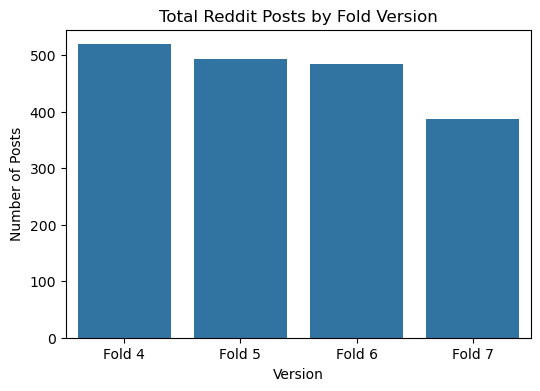

In [37]:
# Count posts by model
counts = df["Version"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.title("Total Reddit Posts by Fold Version")
plt.ylabel("Number of Posts")
plt.show()

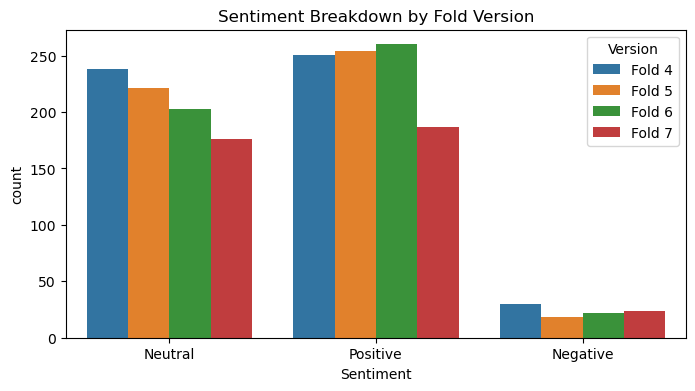

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Sentiment", hue="Version")
plt.title("Sentiment Breakdown by Fold Version")
plt.show()

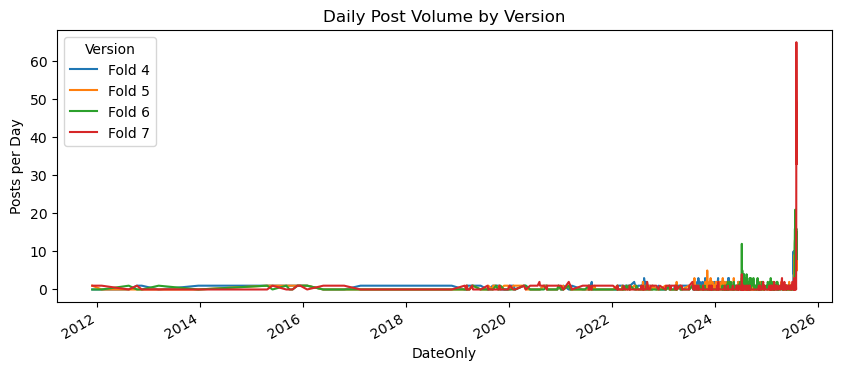

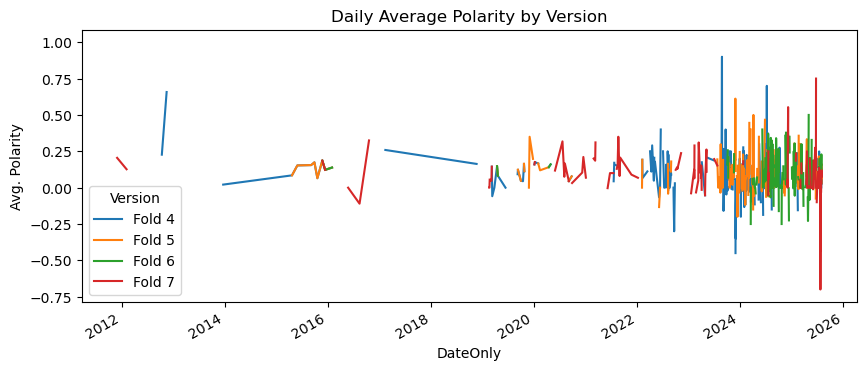

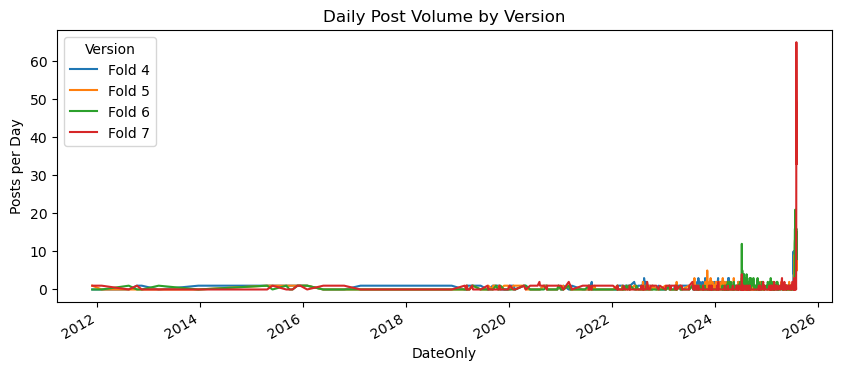

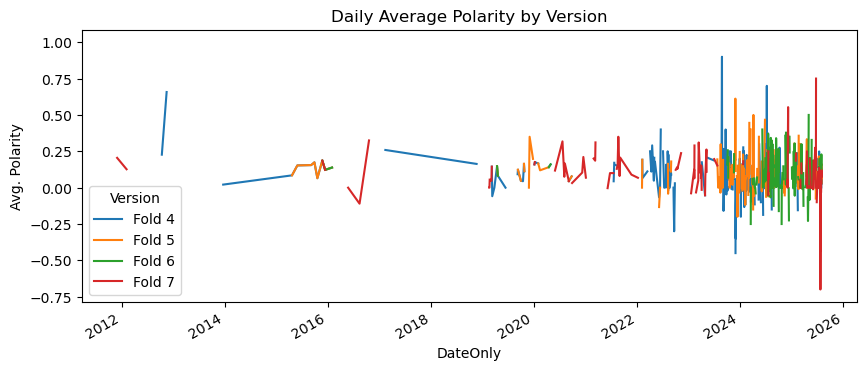

In [39]:
# Convert DateOnly to datetime
df["DateOnly"] = pd.to_datetime(df["DateOnly"])

# Daily post counts
daily = df.groupby(["DateOnly","Version"]).size().unstack(fill_value=0)
daily.plot(figsize=(10,4))
plt.title("Daily Post Volume by Version")
plt.ylabel("Posts per Day")
plt.show()

# Daily average polarity
pol_daily = df.groupby(["DateOnly","Version"])["Polarity"].mean().unstack()
pol_daily.plot(figsize=(10,4))
plt.title("Daily Average Polarity by Version")
plt.ylabel("Avg. Polarity")
plt.show()
# Convert DateOnly to datetime
df["DateOnly"] = pd.to_datetime(df["DateOnly"])

# Daily post counts
daily = df.groupby(["DateOnly","Version"]).size().unstack(fill_value=0)
daily.plot(figsize=(10,4))
plt.title("Daily Post Volume by Version")
plt.ylabel("Posts per Day")
plt.show()

# Daily average polarity
pol_daily = df.groupby(["DateOnly","Version"])["Polarity"].mean().unstack()
pol_daily.plot(figsize=(10,4))
plt.title("Daily Average Polarity by Version")
plt.ylabel("Avg. Polarity")
plt.show()

In [40]:
df.to_csv("/Users/shreychaudhary/Documents/Samsung_Fold7_Sales_Prediction/data/processed/reddit_sentiment.csv", index=False)
print("Saved sentiment data to data/processed/reddit_sentiment.csv")

Saved sentiment data to data/processed/reddit_sentiment.csv


In [41]:
features = [
    "battery", "camera", "price", "display", "hinge",
    "performance", "durability", "software", "design", "size", "weight"
]

In [42]:
import pandas as pd

# We already have df loaded and cleaned, with "Clean_Text" and "Version"
rows = []
for version in df["Version"].unique():
    sub = df[df.Version == version]
    for feat in features:
        # Count posts where the feature appears as a whole word
        cnt = sub["Clean_Text"].str.contains(fr"\b{feat}\b").sum()
        rows.append({
            "Version": version,
            "Feature": feat,
            "Mentions": cnt
        })

feat_df = pd.DataFrame(rows)

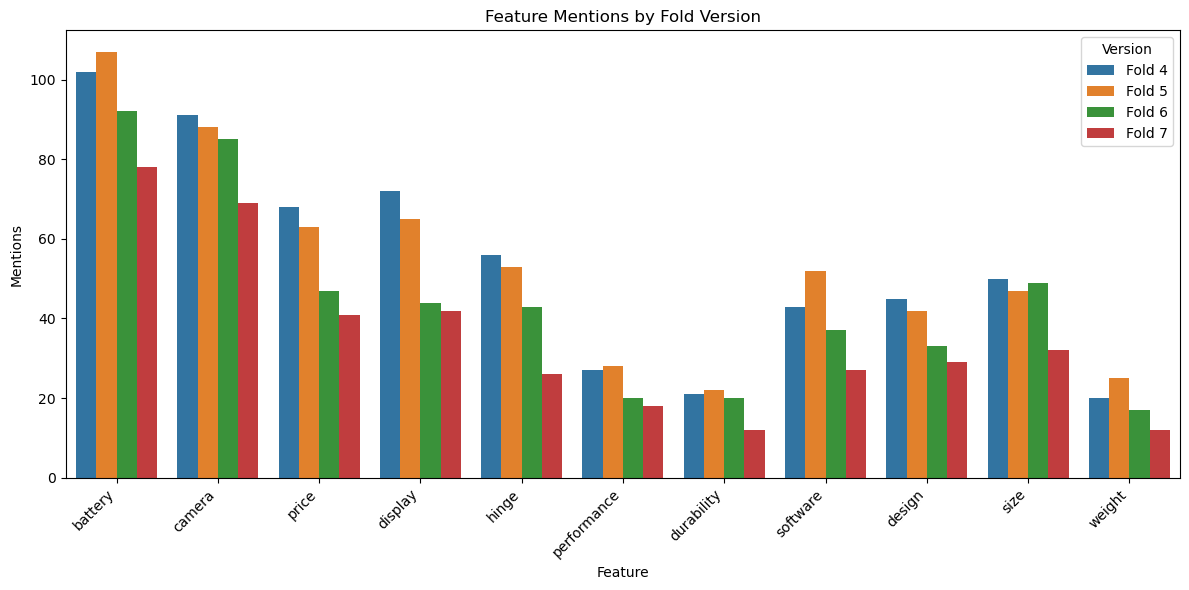

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=feat_df,
    x="Feature",
    y="Mentions",
    hue="Version"
)
plt.xticks(rotation=45, ha="right")
plt.title("Feature Mentions by Fold Version")
plt.tight_layout()
plt.show()

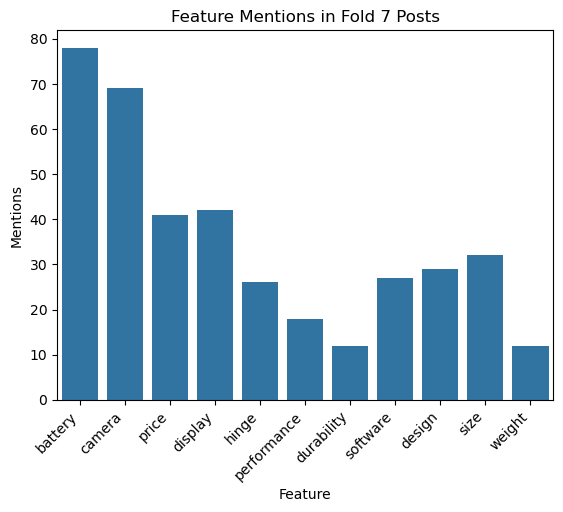

In [44]:
feat_counts = []
for v in df.Version.unique():
    sub = df[df.Version==v]
    for feat in features:
        cnt = sub["Clean_Text"].str.contains(fr"\b{feat}\b").sum()
        feat_counts.append({"Version":v,"Feature":feat,"Mentions":cnt})
feat_df = pd.DataFrame(feat_counts)

# Plot for one version (Fold 7)
sns.barplot(data=feat_df[feat_df.Version=="Fold 7"], x="Feature", y="Mentions")
plt.xticks(rotation=45, ha="right")
plt.title("Feature Mentions in Fold 7 Posts")
plt.show()